In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading demographic data
demographics = pd.read_csv('datasets\demographic.csv')

demographics = demographics[demographics['year'] >= 1985] 
demographics = demographics[demographics['year'] <= 2015]

demographics.head()


,country,year,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,population,migration,political_stability,country_code
25,AFGHANISTAN,1985,NaN,NaN,NaN,45.566,7.458,11783050.0,NaN,NaN,AFG
26,AFGHANISTAN,1986,NaN,NaN,NaN,46.417,7.460,11601041.0,NaN,NaN,AFG
27,AFGHANISTAN,1987,NaN,NaN,NaN,47.288,7.461,11502761.0,-1484185.0,NaN,AFG
28,AFGHANISTAN,1988,NaN,NaN,NaN,48.164,7.461,11540888.0,NaN,NaN,AFG
29,AFGHANISTAN,1989,NaN,NaN,NaN,49.028,7.461,11777609.0,NaN,NaN,AFG


In [2]:
#loading suicides data
suicides = pd.read_csv('datasets\suicide-rates-overview-1985-to-2016.csv')

suicides = suicides[suicides['year'] >= 1985]
suicides = suicides[suicides['year'] <= 2015]
suicides = suicides.drop("country-year", axis=1)

suicides.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [3]:
#adding country codes to suicides dataframe
countryCodes = pd.read_csv('datasets\wikipedia-iso-country-codes.csv')
suicides = pd.merge(suicides,countryCodes[['country','country_code']],on='country')

continents = pd.read_csv("datasets\country-and-continent-codes-list.csv")
continents = continents.rename (columns = {'Three_Letter_Country_Code': 'country_code'})
suicides = pd.merge(suicides,continents[['country_code','Continent_Name']],on='country_code')

suicides.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation,country_code,Continent_Name
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X,ALB,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent,ALB,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X,ALB,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation,ALB,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers,ALB,Europe


In [4]:
#merging suicides and demographics
suicides = pd.merge(suicides,demographics,on=['year','country_code'])
suicides = suicides.drop(['country_y','population_y'], axis=1)
suicides = suicides.rename (columns = {'country_x': 'country', 'population_x': 'population_by_age'})
suicides.reset_index(drop=True)
suicides.head()

,country,year,sex,age,suicides_no,population_by_age,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation,country_code,Continent_Name,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,migration,political_stability
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN


In [5]:
#pd.crosstab(suicides.country, suicides.suicides_no, margins=True)
suicidesPerCountry=suicides.groupby(['country','year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicides = pd.merge(suicides,suicidesPerCountry[['population_by_age']],on=['country','year'])

suicidesPerCountry['suicides_per_100k_pop']=suicidesPerCountry['suicides_no']/suicidesPerCountry['population_by_age']*100000
suicidesPerCountry

suicides_no  population_by_age  suicides_per_100k_pop
country    year                                                       
Albania    1987           73            2709600               2.694125
           1988           63            2764300               2.279058
           1989           68            2803100               2.425886
           1992           47            2822500               1.665190
           1993           73            2807300               2.600363
           1994           50            2849300               1.754817
           1995           88            2903400               3.030929
           1996           89            2940200               3.027005
           1997          170            2977300               5.709871
           1998          154            3012700               5.111694
           1999          139            3029700               4.587913
           2000           54            2796300               1.931123
           2001          119            2799349               4.250988
           2002          133            2818839               4.718255
           2003          124            2843929               4.360165
           2004          146            2874991               5.078277
           2005            0            2783320               0.000000
           2006            0            2780176               0.000000
           2007          124            2770344               4.475978
           2008          160            2757059               5.803285
           2009            0            2745735               0.000000
           2010           96            2736025               3.508740
Argentina  1985         1988           27090800               7.338285
           1986         2284           27244400               8.383374
           1987         2286           27599400               8.282789
           1988         2354           28308000               8.315670
           1989         2247           28702000               7.828723
           1990         2140           29091100               7.356202
           1991         1951           29623000               6.586099
           1992         2184           30045400               7.269000
...                      ...                ...                    ...
Uruguay    2007          576            3087957              18.653109
           2008          523            3100791              16.866664
           2009          511            3114306              16.408150
           2010          547            3127306              17.491093
           2012          599            3151939              19.004175
           2013          546            3164670              17.252984
           2014          591            3177645              18.598679
           2015          630            3190795              19.744296
Uzbekistan 1990         1459           17165700               8.499508
           1991         1393           17347800               8.029837
           1992         1344           18257000               7.361560
           1993         1355           18509300               7.320644
           1994         1419           19144700               7.411973
           1995         1485           19599000               7.576917
           1996         1699           19854500               8.557254
           1997         1554           20364300               7.631001
           1998         1620           20861200               7.765613
           1999         1795           21329916               8.415411
           2000         1919           21789067               8.807169
           2001         1914           22231527               8.609395
           2002         1576           22632256               6.963513
           2003         1416           22982883               6.161107
           2004         1251           23300841               5.368905
           2005         1221           23

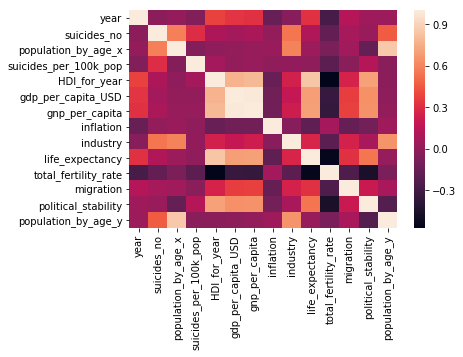

In [6]:
corr = suicides.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
spc= pd.Series(suicidesPerCountry['suicides_per_100k_pop'], index=suicidesPerCountry['year'])
spc= spc.cumsum()
spc.plot()

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

In [24]:
suicidesByGenre=suicides.groupby(['country','sex']).agg({'suicides_per_100k_pop': 'sum'})
suicidesByGenre

suicides_per_100k_pop
country              sex                          
Albania              female                 318.98
                     male                   605.78
Argentina            female                 706.05
                     male                  3188.54
Armenia              female                 233.54
                     male                   702.11
Aruba                female                 276.35
                     male                  1320.17
Australia            female                 956.60
                     male                  3720.81
Austria              female                1934.05
                     male                  6958.95
Azerbaijan           female                  98.35
                     male                   257.89
Bahrain              female                 109.84
                     male                   357.40
Barbados             female                 140.24
                     male                   750.89
Belarus              female                1183.67
                     male                  6647.46
Belgium              female                1937.60
                     male                  5962.90
Belize               female                 244.88
                     male                  1848.61
Brazil               female                 394.84
                     male                  1779.88
Bulgaria             female                1755.16
                     male                  5260.92
Canada               female                 889.69
                     male                  3449.03
...                                            ...
Slovenia             female                1320.67
                     male                  5691.95
South Africa         female                  48.09
                     male                   183.40
Spain                female                 735.01
                     male                  2774.05
Sri Lanka            female                1022.91
                     male                  3636.05
Suriname             female                1760.13
                     male                  5402.19
Sweden               female                1393.24
                     male                  3715.64
Switzerland          female                1236.30
                     male                  3557.77
Thailand             female                 562.60
                     male                  1722.75
Turkey               female                  48.44
                     male                   150.73
Turkmenistan         female                 815.03
                     male                  2179.70
Ukraine              female                1497.09
                     male                  7434.57
United Arab Emirates female                  34.81
                     male                    60.08
United Kingdom       female                 632.80
                     male                  2158.12
Uruguay              female                1094.24
                     male                  5444.72
Uzbekistan           female                 572.38
                     male                  1565.79

[170 rows x 1 columns]